# 代表値と尤度
統計データは要約をすることでおおよその分布が分かったり、また正規分布に従っていれば尖り具合(尖度)やデータの偏り(歪度)が分かる。またデータが正規分布に従っているのであればそのデータがどれだけ尤な値(尤度)を取っているかを調べる必要がある

# ライブラリのインポート

In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# データの取得

In [ ]:
df1 = pd.read_html("https://bellcurve.jp/statistics/course/4320.html")[0]
df2 = pd.read_html("https://bellcurve.jp/statistics/course/4320.html")[1]
df = pd.concat([df1, df2], axis=1)
df

,0,1,2,3,0,1,2
0,階級,階級値,1組の度数,2組の度数,階級,階級値,3組の度数
1,140cm以上145cm未満,142.5,1,1,140cm以上145cm未満,142.5,2
2,145cm以上150cm未満,147.5,3,5,145cm以上150cm未満,147.5,0
3,150cm以上155cm未満,152.5,5,11,150cm以上155cm未満,152.5,1
4,155cm以上160cm未満,157.5,7,7,155cm以上160cm未満,157.5,2
5,160cm以上165cm未満,162.5,9,5,160cm以上165cm未満,162.5,5
6,165cm以上170cm未満,167.5,7,2,165cm以上170cm未満,167.5,7
7,170cm以上175cm未満,172.5,5,1,170cm以上175cm未満,172.5,11
8,175cm以上180cm未満,177.5,3,0,175cm以上180cm未満,177.5,5
9,180cm以上185cm未満,182.5,1,2,180cm以上185cm未満,182.5,1


# データの整形

In [ ]:
arr = df.values
col = ["1組の度数","2組の度数","3組の度数"]
ind = arr[1:, 0]
cla_1 = arr[1:, 2].astype("float")
cla_2 = arr[1:, 3].astype("float")
cla_3 = arr[1:, 6].astype("float")
cla = np.vstack((cla_1, cla_2))
cla = np.vstack((cla, cla_3))
cla = cla.T
df = pd.DataFrame(cla)
df.columns = col
df.index = ind
df

,1組の度数,2組の度数,3組の度数
140cm以上145cm未満,1.0,1.0,2.0
145cm以上150cm未満,3.0,5.0,0.0
150cm以上155cm未満,5.0,11.0,1.0
155cm以上160cm未満,7.0,7.0,2.0
160cm以上165cm未満,9.0,5.0,5.0
165cm以上170cm未満,7.0,2.0,7.0
170cm以上175cm未満,5.0,1.0,11.0
175cm以上180cm未満,3.0,0.0,5.0
180cm以上185cm未満,1.0,2.0,1.0


# 尖度

In [ ]:
df.skew()

1組の度数    0.146355
2組の度数    1.086613
3組の度数    1.086613
dtype: float64

# 歪度

In [ ]:
df.kurt()

1組の度数   -1.060058
2組の度数    0.707149
3組の度数    0.707149
dtype: float64

# 要約統計量

In [ ]:
pd.concat([df["1組の度数"].describe(), df["2組の度数"].describe(), df["3組の度数"].describe()], axis=1)

,1組の度数,2組の度数,3組の度数
count,9.000000,9.000000,9.000000
mean,4.555556,3.777778,3.777778
std,2.788867,3.562926,3.562926
min,1.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000
50%,5.000000,2.000000,2.000000
75%,7.000000,5.000000,5.000000
max,9.000000,11.000000,11.000000


# 尤度の計算

In [ ]:
np.random.seed(1)
fit1 = np.random.normal(np.mean(df["1組の度数"].values), np.var(df["1組の度数"].values), len(df["1組の度数"].values))
fit2 = np.random.normal(np.mean(df["2組の度数"].values), np.var(df["2組の度数"].values), len(df["2組の度数"].values))
fit3 = np.random.normal(np.mean(df["3組の度数"].values), np.var(df["3組の度数"].values), len(df["3組の度数"].values))

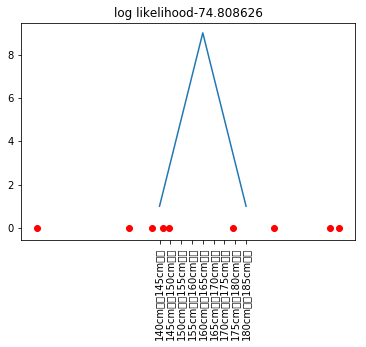

In [ ]:
L1 = 1 / np.sqrt(2 * np.pi * np.var(df["1組の度数"].values) ** 2) * np.exp(-0.5 * (fit1 - np.mean(df["1組の度数"].values)) ** 2 / np.var(df["1組の度数"].values))
plt.plot(df.index, df["1組の度数"])
plt.scatter(fit1, np.zeros_like(fit1), color="#FF0000")
plt.xticks(rotation=90)
plt.title("log likelihood%6f"%np.log(np.prod(L1)))
plt.show()

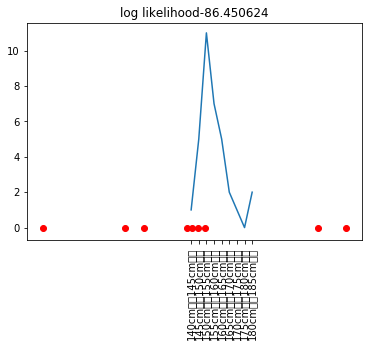

In [ ]:
L2 = 1 / np.sqrt(2 * np.pi * np.var(df["2組の度数"].values) ** 2) * np.exp(-0.5 * (fit2 - np.mean(df["2組の度数"].values)) ** 2 / np.var(df["2組の度数"].values))
plt.plot(df.index, df["2組の度数"])
plt.scatter(fit2, np.zeros_like(fit2), color="#FF0000")
plt.xticks(rotation=90)
plt.title("log likelihood%6f"%np.log(np.prod(L2)))
plt.show()

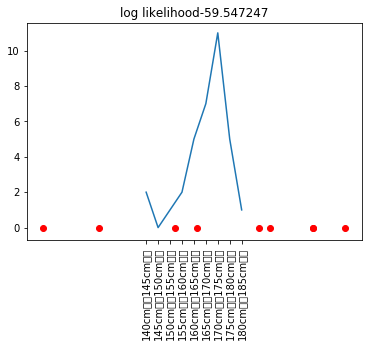

In [ ]:
L3 = 1 / np.sqrt(2 * np.pi * np.var(df["3組の度数"].values) ** 2) * np.exp(-0.5 * (fit3 - np.mean(df["3組の度数"].values)) ** 2 / np.var(df["3組の度数"].values))
plt.plot(df.index, df["3組の度数"])
plt.scatter(fit3, np.zeros_like(fit3), color="#FF0000")
plt.xticks(rotation=90)
plt.title("log likelihood%6f"%np.log(np.prod(L3)))
plt.show()